In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics

In [317]:
bigmart = pd.read_csv("/content/Train.csv")

In [318]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [319]:
bigmart.shape

(8523, 12)

In [320]:
bigmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<ipython-input-321-415819471d26>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bigmart['Item_Weight'])


<Axes: xlabel='Item_Weight', ylabel='Density'>

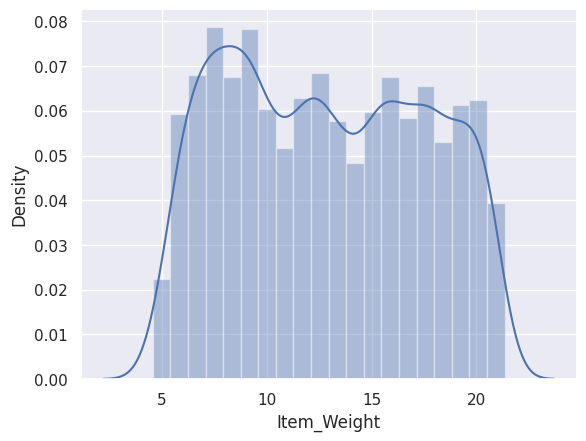

In [321]:

sns.distplot(bigmart['Item_Weight'])


In [355]:
bigmart['Item_Weight'].fillna(value=bigmart['Item_Weight'].mean, inplace=True)



In [325]:
bigmart.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [326]:
print(bigmart['Outlet_Type'])
mode_outlet_size = bigmart.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
3           Grocery Store
4       Supermarket Type1
              ...        
8518    Supermarket Type1
8519    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 8523, dtype: object


In [327]:
print(mode_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [328]:
missing_values = bigmart['Outlet_Size'].isnull()

In [329]:

missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [330]:
print(bigmart['Outlet_Size'])


0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object


In [331]:
bigmart.loc[missing_values, 'Outlet_Size'] = bigmart.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_outlet_size[x])
print(bigmart['Outlet_Size'])


0       Medium
1       Medium
2       Medium
3        Small
4         High
         ...  
8518      High
8519     Small
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object


In [332]:
bigmart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [333]:
bigmart['Item_Weight']

0         9.3
1        5.92
2        17.5
3        19.2
4        8.93
        ...  
8518    6.865
8519     8.38
8520     10.6
8521     7.21
8522     14.8
Name: Item_Weight, Length: 8523, dtype: object

In [334]:
sns.set()

<ipython-input-335-7e13ddef7ff2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bigmart['Item_Visibility'])


<Axes: xlabel='Item_Visibility', ylabel='Density'>

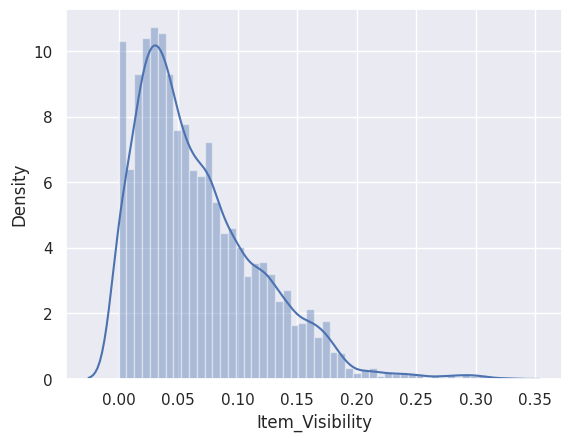

In [335]:
sns.distplot(bigmart['Item_Visibility'])


<Axes: xlabel='Item_Fat_Content', ylabel='count'>

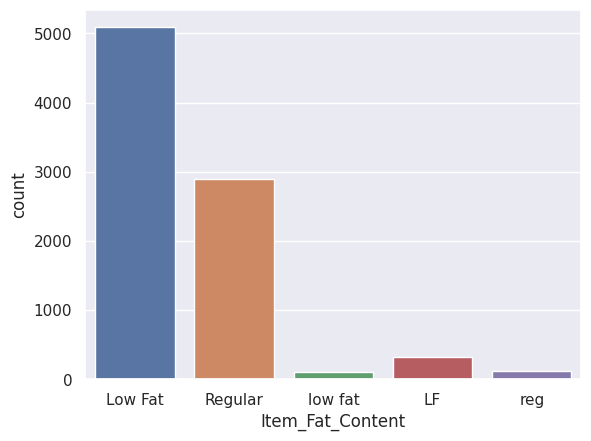

In [336]:
sns.countplot(x='Item_Fat_Content', data=bigmart)

In [337]:

bigmart.replace({'Item_Fat_Content':{'low fat': 'Low Fat', "LF": 'Low Fat', 'reg':'Regular'}},inplace=True)

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

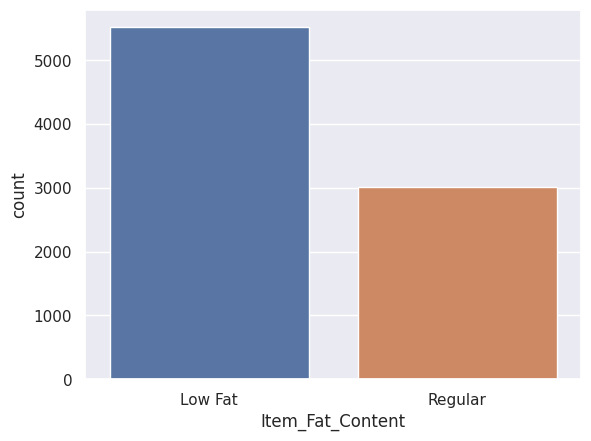

In [338]:
sns.countplot(x='Item_Fat_Content', data=bigmart)

In [339]:
# Label Encoding

encoder = LabelEncoder()
print(bigmart['Outlet_Type'])


0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
3           Grocery Store
4       Supermarket Type1
              ...        
8518    Supermarket Type1
8519    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 8523, dtype: object


In [340]:
bigmart['Item_Identifier'] = encoder.fit_transform(bigmart['Item_Identifier'])

In [341]:
bigmart['Item_Fat_Content'] = encoder.fit_transform(bigmart['Item_Fat_Content'])
bigmart['Item_Type'] = encoder.fit_transform(bigmart['Item_Type'])
bigmart['Outlet_Identifier'] = encoder.fit_transform(bigmart['Outlet_Identifier'])
bigmart['Outlet_Location_Type'] = encoder.fit_transform(bigmart['Outlet_Location_Type'])
bigmart['Outlet_Type'] = encoder.fit_transform(bigmart['Outlet_Type'])

In [342]:
bigmart['Outlet_Size'] = encoder.fit_transform(bigmart['Outlet_Size'])


In [356]:
X = bigmart.drop(columns=['Item_Outlet_Sales', 'Item_Weight'], axis=1)
Y = bigmart['Item_Outlet_Sales']

In [357]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state = 2)

In [358]:
model = XGBRegressor()

In [359]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 5969 to 7336
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   int64  
 1   Item_Fat_Content           5966 non-null   int64  
 2   Item_Visibility            5966 non-null   float64
 3   Item_Type                  5966 non-null   int64  
 4   Item_MRP                   5966 non-null   float64
 5   Outlet_Identifier          5966 non-null   int64  
 6   Outlet_Establishment_Year  5966 non-null   int64  
 7   Outlet_Size                5966 non-null   int64  
 8   Outlet_Location_Type       5966 non-null   int64  
 9   Outlet_Type                5966 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 512.7 KB


In [360]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [363]:
predict_train = model.predict(X_train)
r2_train = metrics.r2_score(Y_train, predict_train)
r2_train

0.8616919934809528

In [364]:
predict_test = model.predict(X_test)
r2_test = metrics.r2_score(Y_test, predict_test)
r2_test

0.5521054949585359